# Module 1 Code Challenge

This code challenge is designed to test your understanding of the Module 1 material. It covers:

- Pandas
- Data Visualization
- Exploring Statistical Data
- Python Data Structures

_Read the instructions carefully._ You will be asked both to write code and to respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

---
## Part 1: Pandas [Suggested Time: 15 minutes]
---

In this section you will be doing some preprocessing for a dataset for the videogame [FIFA19](https://www.kaggle.com/karangadiya/fifa19). The dataset contains both data for the game as well as information about the players' real life careers.

In [108]:
# Run this cell without changes

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read the CSV file into a pandas DataFrame

The data you'll be working with is in a file called `'./data/fifa.csv'`. Use your knowledge of pandas to create a new DataFrame, called `df`, using the data from this CSV file. 

Check the contents of the first few rows of your DataFrame, then show the size of the DataFrame. 

In [109]:
# Replace None with appropriate code
df = pd.read_csv('./data/fifa.csv')

In [110]:
# Code here to check the first few rows of the DataFrame
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [111]:
# Code here to see the size of the DataFrame
df.size

1602216

### 1.2) Drop rows with missing values for `'Release Clause'`
    
Drop rows for which "Release Clause" is none or not given. This is part of a soccer player's contract dealing with being bought out by another team. After you have dropped them, see how many rows are remaining.

In [112]:
## 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [113]:
df['Release Clause'].isna().sum()

1564

In [114]:
# Code here to drop rows with missing values for 'Release Clause'
df.dropna(inplace = True, axis = 0, subset = ['Release Clause'])

In [115]:
# Code here to check how many rows are left 
df.shape

(16643, 88)

In [116]:
df['Release Clause'].isna().sum()

0

### 1.3) Convert the `'Release Clause'` Price from Euros to Dollars

Now that there are no missing values, we can change the values in the `'Release Clause'` column from Euro to Dollar amounts.

Assume the current exchange rate is `1 Euro = 1.2 Dollars`

In [117]:
# Code here to convert the column of euros to dollars
df['Release Clause'] = df['Release Clause'].apply(lambda x: x*1.2)

In [118]:
df['Release Clause'].head()

0    271800.0
1    152520.0
2    273720.0
3    166320.0
4    235680.0
Name: Release Clause, dtype: float64

---
## Part 2: Data Visualization [Suggested Time: 20 minutes]
---

Continuing to use the same FIFA dataset, plot data using whichever plotting library you are most comfortable with.

In [119]:
# Run this cell without changes

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1) Find the top 10 countries with the most players (using the `'Nationality'` column). Create a bar chart showing the number of players from those 10 countries.

Don't forget to add a **title** and **x axis label** to your charts.

If you are unable to find the top 10 countries but want the chance to demonstrate your plotting skills use the following dummy data to create a bar chart: 

```
Country Name  | Num Players
============  | ===========
Country A     | 100
Country B     | 60
Country C     | 125
Country D     | 89
```

In [120]:
# Code here to get the top 10 countries with the most players
df["Nationality"].value_counts().head(10)

England        1475
Germany        1151
Spain           974
France          853
Argentina       833
Brazil          788
Italy           579
Colombia        570
Japan           455
Netherlands     426
Name: Nationality, dtype: int64

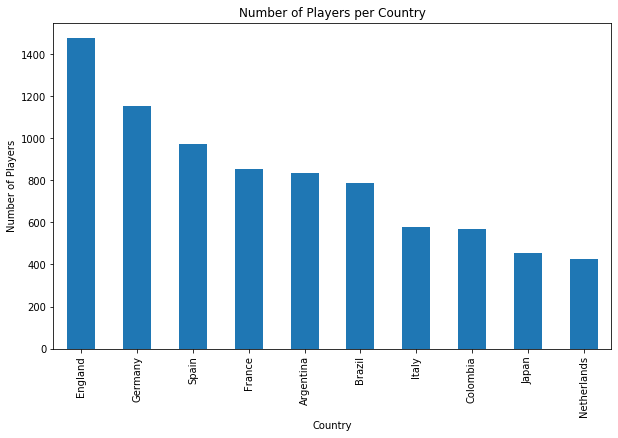

In [121]:
# Code here to plot a bar chart.  A recommended figsize is (10, 6)
data = df["Nationality"].value_counts().head(10)
plt.figure(figsize=(10,6))
data.plot(kind = 'bar')
plt.title("Number of Players per Country")
plt.ylabel("Number of Players")
plt.xlabel("Country")
plt.show()

### 2.2) Describe the relationship between `StandingTackle` and `SlidingTackle`, as shown in the scatter plot produced below.

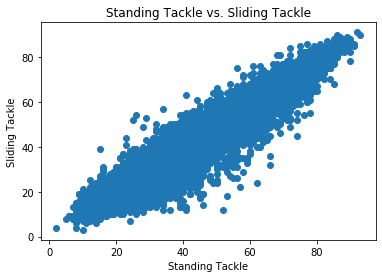

In [122]:
# Run this cell without changes

fig, ax = plt.subplots()

ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')

x = df['StandingTackle']
y = df['SlidingTackle']

ax.scatter(x, y)

Please describe in words the relationship between these two features.

In [123]:
# Your written answer here
#The relationship between these two features, I would estimate as linear, even if majority of the points not 
# exactly on the line, but rather below or above it, but they still tend to group around the straight line, 
# with tangent of around 45 degree and y intercept at 0: y=x is the line.
# Also, the shape of the data looks like oval, there is an option to describe the relationship as within 
# the oval shape. if more detailed anlysis will require.

---
## Part 3: Exploring Statistical Data [Suggested Time: 20 minutes]
---

### 3.1) What are the mean age and the median age for the players in this dataset?

In [124]:
# Code here to find the mean age and median age
df.Age.mean()

25.226221234152497

In [125]:
df.Age.median()

25.0

In your own words, how are the mean and median related to each other and what do these values tell us about the distribution of the column `'Age'`? 

In [126]:
# Your written answer here
# mean is more sensitive to outliers than median. But as per our data mean and median very close, 
# I would estimate that age distribution is symmetrical, meaning we 
# do not have too much outliers on either side of the mean (and median).

### 3.2) Who is the oldest player from Argentina and how old is he?
Use the `Nationality` column.

In [127]:
# Code here to find the oldest player in Argentina
df.groupby(["Nationality", "Name"])['Age'].max()["Argentina"].sort_values(ascending=False).head(3)

Name
C. Muñoz        41
C. Lucchetti    40
S. Bertoli      40
Name: Age, dtype: int64

In [128]:
# Your written answer here
# player: C.Munoz 
# age: 41 years old

---
## Part 4: Python Data Structures [Suggested Time: 20 min]
---

In this final section, we will work with various Python data types and try to accomplish certain tasks using some fundamental data structures in Python, rather than using Pandas DataFrames. Below, we've defined a dictionary with soccer player names as keys for nested dictionaries containing information about each player's age, nationality, and a list of teams they have played for.

In [129]:
# Run this cell without changes

players = {
    'L. Messi': {
        'age': 31,
        'nationality': 'Argentina',
        'teams': ['Barcelona']
    },
    'Cristiano Ronaldo': {
        'age': 33,
        'nationality': 'Portugal',
        'teams': ['Juventus', 'Real Madrid', 'Manchester United']
    },
    'Neymar Jr': {
        'age': 26,
        'nationality': 'Brazil',
        'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
    },
    'De Gea': {
        'age': 27,
        'nationality': 'Spain',
        'teams': ['Atletico Madrid', 'Manchester United']
    },
    'K. De Bruyne': {
        'age': 27,
        'nationality': 'Belgium',
        'teams': ['Chelsea', 'Manchester City']
    }
}

### 4.1) Create a `list` of all the keys in the `players` dictionary. Store the list of player names in a variable called `player_names` to use in the next question.

Use [Python's documentation on dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for help if needed. 

In [130]:
players

{'L. Messi': {'age': 31, 'nationality': 'Argentina', 'teams': ['Barcelona']},
 'Cristiano Ronaldo': {'age': 33,
  'nationality': 'Portugal',
  'teams': ['Juventus', 'Real Madrid', 'Manchester United']},
 'Neymar Jr': {'age': 26,
  'nationality': 'Brazil',
  'teams': ['Santos', 'Barcelona', 'Paris Saint-German']},
 'De Gea': {'age': 27,
  'nationality': 'Spain',
  'teams': ['Atletico Madrid', 'Manchester United']},
 'K. De Bruyne': {'age': 27,
  'nationality': 'Belgium',
  'teams': ['Chelsea', 'Manchester City']}}

In [131]:
# Replace None with appropriate code to get the list of all player names

player_names = list(players.keys())

In [132]:
# Run this cell without changes to check your answer

print(player_names)

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']


### 4.2) Great! Now that we have the names of all players, let's use that information to create a `list` of `tuples` containing each player's name along with their nationality. Store the list in a variable called `player_nationalities`.

In [133]:
# Replace None with appropriate code to generate list of tuples such that 
# the first element is a players name and the second is their nationality 
# Ex: [('L. Messi', 'Argentina'), ('Christiano Ronaldo', 'Portugal'), ...]

li = list(players.values())
nat_li = []
for i in li:
    nat_li.append(i['nationality'])
nat_li
    
player_nationalities = list(zip(player_names,nat_li))


In [134]:
# Run this cell without changes to check your answer

print(player_nationalities)

[('L. Messi', 'Argentina'), ('Cristiano Ronaldo', 'Portugal'), ('Neymar Jr', 'Brazil'), ('De Gea', 'Spain'), ('K. De Bruyne', 'Belgium')]


### 4.3) Define a function called `get_players_on_team()` that returns a `list` of the names of all the players who have played on a given team.

Your function should take two arguments: 

- a dictionary of player information
- the team name (as a `string`) you are trying to find the players for 

**Be sure that your function has a `return` statement.**

In [135]:
players

{'L. Messi': {'age': 31, 'nationality': 'Argentina', 'teams': ['Barcelona']},
 'Cristiano Ronaldo': {'age': 33,
  'nationality': 'Portugal',
  'teams': ['Juventus', 'Real Madrid', 'Manchester United']},
 'Neymar Jr': {'age': 26,
  'nationality': 'Brazil',
  'teams': ['Santos', 'Barcelona', 'Paris Saint-German']},
 'De Gea': {'age': 27,
  'nationality': 'Spain',
  'teams': ['Atletico Madrid', 'Manchester United']},
 'K. De Bruyne': {'age': 27,
  'nationality': 'Belgium',
  'teams': ['Chelsea', 'Manchester City']}}

In [136]:
# Code here to define your get_players_on_team() function 
def get_players_on_team(players, team):
    li = []
    for key, val in players.items():
        for i in val['teams']:
            if i == team:
                li.append(key)
    return li
    
        
    
    

In [137]:
# Run this cell without changes to check your answer

players_on_manchester_united = get_players_on_team(players, 'Manchester United')
print(players_on_manchester_united)

['Cristiano Ronaldo', 'De Gea']
